# Tutorial
In this notebook, I review basic usage of our python wrapper.  

## Compile python wrapper
First of all, you need to install the python wrapper `pyecl`.
`Eclairs` needs C++ compiler, GSL, and Boost library.
Please make sure that yout Boost library has numpy extension since older versions of Boost do not include it.  
After specifying paths for these libarary in Makefile, codes can be built with `make`.

```
$ make pyeclairs
```

`pip` tries to install the wrapper and then, you can run following scripts.

## Computing matter power spectra based on RegPT 2loop
The basic feature of this code is computing matter power spectra. 
Though Eisenstein-Hu fitting formula is available, the transfer function can be passed from a precomputed table or numpy array computed with other codes, e.g., CAMB or CLASS.  
Here, I use `CLASS` module to compute the transfer function.

In [ ]:
import numpy as np
from classy import Class
import pyecl.pyeclairs as pyecl

Set cosmological parameters.

In [ ]:
# Planck 2015 cosmological parameters

h = 0.6727
omega_b = 0.02225
omega_cdm = 0.1198
n_s = 0.9645
A_s = 2.2065e-9
k_pivot = 0.05
z = 1.0

In [2]:
params_C = {"output": "mPk, mTk",
            "h": h,
            "omega_cdm": omega_cdm,
            "omega_b": omega_b,
            "n_s": n_s,
            "A_s": A_s,
            "z_pk": z,
            'm_ncdm': 0.06,
            'YHe': 'BBN',
            'k_pivot': k_pivot,
            'k_scalar_min_tau0': 1e-05,
            'P_k_max_h/Mpc': 50.0,
            'N_ncdm': 1,
            'T_ncdm': 0.715985,
            'N_eff': 2.03351}

cosmo = Class()
cosmo.set(params_C)
cosmo.compute()

transfer = cosmo.get_transfer(0.0, "camb")
q = transfer["k (h/Mpc)"]
Tk = transfer["-T_tot/k2"]

Then, set the parameters for `pyecl`. In this example, we will compute the matter power spectrum based on RegPT 2-loop with the direct integration.

In [ ]:
params_E = {"H0": H0,
            "Omega_m": Omega_m,
            "Omega_b": Omega_b,
            "ns": n_s,
            "As": A_s,
            "k_pivot": k_pivot,
            "z": z,
            "output": False,
            "direct_mode": True
            }

Pyeclairs = pyecl.pyeclairs()
Pyeclairs.initialize(params_E, q, Tk)

Next, we compute the power spectra. The first argument `k` is the wave-numbers at which power spectra are computed. The second argument specifies density-auto `dd`, density-velocity cross `dt`, and velocity-auto `tt`. The third argument is the model you want to use, i.e. `RegPT` or `SPT`.

In [6]:
# As it may take time, you can reduce the number of k by speeding up.
k = np.linspace(0.01, 0.3, 30)
res = pyecl.get_spectra_2l(k, ["dd", "dt", "tt"], "RegPT")

print(res)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3 ] [8370.53301717 9148.22482941 7494.65397333 5763.95189106 4688.30742112
 4107.52877961 3649.33574558 3111.43204449 2554.53899751 2120.78917718
 1854.86677267 1704.15075428 1574.18299082 1417.57910378 1247.61099714
 1099.79606091  995.33498175  925.58340503  868.92301217  809.60885821
  743.4250724   681.5876298   629.69002623  588.50611162  554.08281002
  520.61663791  487.34961521  454.19822006  423.97506436  396.54285879]


The computation is done. Let's plot the results with matplotlib.

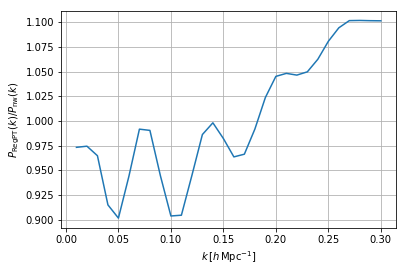

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

Pnw = pyecl.get_Pnowiggle(k)

plt.plot(k, res["dd"]/Pnw, label="$P_{\delta \delta} (k)$")
plt.plot(k, res["dt"]/Pnw, label="$P_{\delta \delta} (k)$")
plt.plot(k, res["tt"]/Pnw, label="$P_{\theta \theta} (k)$")

plt.xlabel(r"$k \, [h \, \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P^\mathrm{RegPT} (k) / P_\mathrm{nw} (k)$")
plt.grid()